In [1]:
import math

from PIL import Image, ImageColor
import IPython.display

from Position import Position
from Piece import Piece
from Board import Board
from Game import Game
from Bot import Bot

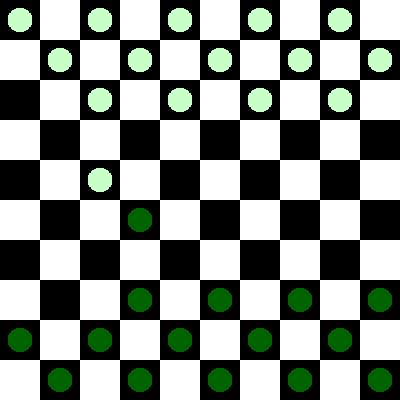

In [ ]:
b1 = Bot()
b2 = Bot()
game = Game(b1, b2)
game.play_bots(True)

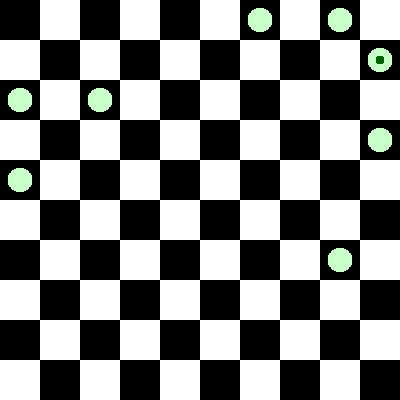

WHITE WINS


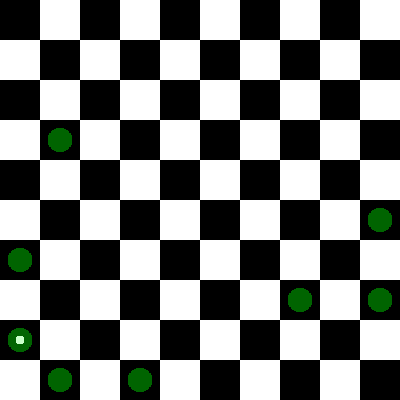

{'moves': [[{'y': 2, 'x': 0}, {'y': 3, 'x': 1}],
  [{'y': 2, 'x': 4}, {'y': 3, 'x': 3}],
  [{'y': 1, 'x': 1}, {'y': 2, 'x': 0}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 7}],
  [{'y': 0, 'x': 0}, {'y': 1, 'x': 1}],
  [{'y': 3, 'x': 7}, {'y': 4, 'x': 6}],
  [{'y': 2, 'x': 4}, {'y': 3, 'x': 5}],
  [{'y': 2, 'x': 6}, {'y': 3, 'x': 5}],
  [{'y': 3, 'x': 1}, {'y': 4, 'x': 0}],
  [{'y': 4, 'x': 6}, {'y': 5, 'x': 7}],
  [{'y': 2, 'x': 2}, {'y': 3, 'x': 1}],
  [{'y': 5, 'x': 7}, {'y': 6, 'x': 6}],
  [{'y': 1, 'x': 3}, {'y': 2, 'x': 4}],
  [{'y': 3, 'x': 5}, {'y': 4, 'x': 4}],
  [{'y': 2, 'x': 4}, {'y': 4, 'x': 2}],
  [{'y': 4, 'x': 4}, {'y': 5, 'x': 3}],
  [{'y': 3, 'x': 5}, {'y': 5, 'x': 7}, {'y': 7, 'x': 5}],
  [{'y': 1, 'x': 5}, {'y': 3, 'x': 3}],
  [{'y': 4, 'x': 2}, {'y': 5, 'x': 1}],
  [{'y': 2, 'x': 2}, {'y': 3, 'x': 1}],
  [{'y': 1, 'x': 1}, {'y': 2, 'x': 2}],
  [{'y': 3, 'x': 1}, {'y': 4, 'x': 0}],
  [{'y': 2, 'x': 6}, {'y': 3, 'x': 7}],
  [{'y': 2, 'x': 0}, {'y': 3, 'x': 1}],
  [{'y': 2, '

In [2]:
import time
from cmath import inf
from typing import List

from Piece import Piece
from Position import Position
from Board import Board


class OldBot:
    def make_move(self, board: Board) -> List[type(Position)]:
        start_time = time.time()
        best_move = []

        for depth in range(1, 100):
            best_move = self.get_best_move(board, depth)

            print(depth)
            if time.time() >= start_time + 0.2:
                break

        return best_move

    def get_best_move(self, board: Board, depth):
        best_score = -inf
        best_move = []

        for move in self.get_possible_moves(board):
            new_board = board.make_move(move)
            new_score = -self.evaluate_board(new_board, depth - 1, -inf, inf, False)

            if new_score > best_score or best_score == -inf:
                best_move = move
                best_score = new_score

        return best_move

    def evaluate_board(self, board: Board, rec_left, best, worst, my_turn):
        if rec_left <= 0:
            return self.get_board_score(board)

        moves = self.get_possible_moves(board)
        new_boards = [board.make_move(move) for move in moves]
        new_boards = sorted(new_boards, key=lambda b: -self.get_board_score(b))

        best_score = inf if not my_turn else -inf
        for new_board in new_boards:
            new_score = -self.evaluate_board(new_board, rec_left - 1, best, worst, not my_turn)

            if my_turn:
                best = max(best, new_score)
                if new_score >= worst:
                    return new_score

                best_score = max(best_score, new_score)
            else:
                worst = min(worst, new_score)
                if new_score > best:
                    return new_score

                best_score = min(best_score, new_score)

        return best_score

    def get_board_score(self, board: Board):
        if board.white_lost():
            return -inf
        return self.get_white_score(board) - self.get_white_score(board.revert())

    def get_white_score(self, board: Board):
        score = 0.0
        for piece in board.whites:
            if not piece.king:
                score += (piece.position().y / 9.0) * 0.2
            score += 3 if piece.king else 1

        return score

    def get_possible_moves(self, board: Board):
        moves = []

        if not board.capture_possible():
            for piece in board.whites:
                possible_positions = list(self.get_possible_next_positions(piece, board))
                possible_positions = [p[0] for p in possible_positions]
                possible_positions = [pos for pos in possible_positions if
                                      board.on_board(pos) and board.world[pos.y][pos.x] is None]
                new_moves = [[piece.position(), pos] for pos in possible_positions]
                if len(new_moves) > 0:
                    moves.extend(new_moves)
        else:
            for piece in board.whites:
                moves.extend(list(self.get_capture_moves(piece, board)))

        return moves

    # Returns a list of pairs: [pos, capture_pos]
    # Probably not valid though
    def get_possible_next_positions(self, piece: Piece, board: Board, first_move=True, bad_xd=0, bad_yd=0):
        if not piece.king:
            for yd in [-1, 1]:
                if yd == -1 and first_move:
                    continue

                for xd in [-1, 1]:
                    yield [Position(piece.y + 1, piece.x + xd), Position(piece.y + 2, piece.x + xd * 2)]
        else:
            for xd in [-1, 1]:
                for yd in [-1, 1]:
                    if bad_yd == yd and bad_xd == xd:
                        continue

                    for i in range(1, 9):
                        pos = Position(piece.y + i * yd, piece.x + i * xd)
                        capture_pos = []
                        if not board.isEmpty(pos):
                            for j in range(i + 1, 9):
                                cap_pos = Position(piece.y + j * yd, piece.x + j * xd)
                                if not board.on_board(cap_pos) or not board.isEmpty(cap_pos):
                                    break
                                capture_pos.append(cap_pos)

                        if len(capture_pos) > 0:
                            yield [pos, capture_pos]

                        if not board.on_board(pos) or not board.isEmpty(pos):
                            break

    def get_capture_moves(self, piece: Piece, board: Board, first_capture=True):
        if not piece.king:
            for pos_pair in self.get_possible_next_positions(piece, board, first_capture):
                if board.on_board(pos_pair[0]) and board.on_board(pos_pair[1]):
                    if board.isBlack(pos_pair[0]) and board.isEmpty(pos_pair[1]):
                        yield [piece.position(), pos_pair[1]]

                        new_board = board.make_single_move(piece.position(), pos_pair[1], True, first_capture)
                        new_piece = new_board.world[pos_pair[1].y][pos_pair[1].x]
                        additional = self.get_capture_moves(new_piece, new_board, False)

                        for extra in additional:
                            move = [piece.position()]
                            move.extend(extra)

                            yield move

    def valid_location(self, y, x, board):
        return 0 <= x < 10 and 0 <= y < 10 and board.world[y][x] is None
    
b1 = Bot()
b2 = OldBot()
game = Game(b1, b2)
game.play_bots(True)

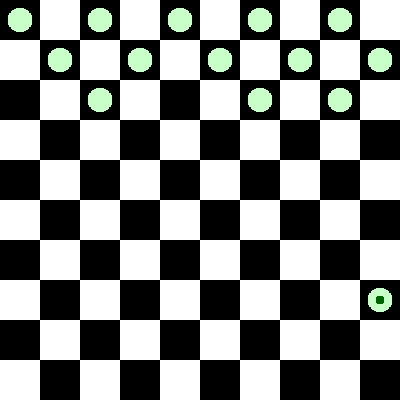

WHITE WINS


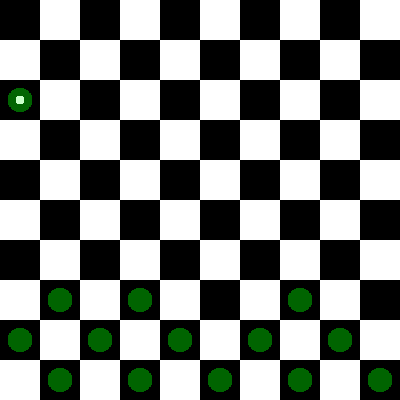

{'moves': [[{'y': 2, 'x': 0}, {'y': 3, 'x': 1}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 9}],
  [{'y': 3, 'x': 1}, {'y': 4, 'x': 2}],
  [{'y': 3, 'x': 9}, {'y': 4, 'x': 8}],
  [{'y': 4, 'x': 2}, {'y': 6, 'x': 0}],
  [{'y': 1, 'x': 7}, {'y': 2, 'x': 8}],
  [{'y': 6, 'x': 0}, {'y': 8, 'x': 2}, {'y': 6, 'x': 4}],
  [{'y': 2, 'x': 6}, {'y': 4, 'x': 4}],
  [{'y': 2, 'x': 4}, {'y': 3, 'x': 5}],
  [{'y': 4, 'x': 4}, {'y': 5, 'x': 5}],
  [{'y': 3, 'x': 5}, {'y': 5, 'x': 3}],
  [{'y': 2, 'x': 4}, {'y': 3, 'x': 5}],
  [{'y': 5, 'x': 3}, {'y': 7, 'x': 5}, {'y': 9, 'x': 3}],
  [{'y': 2, 'x': 2}, {'y': 3, 'x': 3}],
  [{'y': 9, 'x': 3}, {'y': 5, 'x': 7}],
  [{'y': 2, 'x': 0}, {'y': 3, 'x': 1}],
  [{'y': 5, 'x': 7}, {'y': 7, 'x': 9}],
  [{'y': 1, 'x': 9}, {'y': 2, 'x': 8}],
  [{'y': 7, 'x': 9}, {'y': 3, 'x': 5}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 7}],
  [{'y': 3, 'x': 5}, {'y': 7, 'x': 1}],
  [{'y': 0, 'x': 8}, {'y': 1, 'x': 7}],
  [{'y': 7, 'x': 1}, {'y': 9, 'x': 3}],
  [{'y': 1, 'x': 3}, {'y': 2, 'x': 

In [2]:

from Game import *

# min max bot
class CringeBot():

    def eval(self, board):

        number_of_whites = (len(board.whites) - len(board.blacks)) / (len(board.whites) + len(board.blacks))
        number_of_kings = 0
        for white in board.whites:
            if white.king:
                number_of_kings += 1
        for black in board.blacks:
            if black.king:
                number_of_kings -= 1

        value = number_of_whites + number_of_kings
        return value

    def tup(self, pos):
        return (pos.y, pos.x)

    def captures(self, board, move_so_far):
        already_captured = set()

        for i in range(len(move_so_far) - 1):
            y = (move_so_far[i].y + move_so_far[i + 1].y) // 2
            x = (move_so_far[i].x + move_so_far[i + 1].x) // 2
            already_captured.add((y, x))

        pos = move_so_far[-1]
        returning = []

        for i in [-1,1]:
            for j in [-1,1]:
                if (y + i, x + j) in already_captured:
                    continue

                if board.isBlack(pos.add(i, j)):
                    if board.isEmpty(pos.add(2*i, 2*j)):
                        new_move_so_far = [i for i in move_so_far] + [pos.add(2*i, 2*j)]
                        for q in self.captures(board, new_move_so_far):
                            returning.append(q)

        return returning

    def king_captures(self, board, pos, already_captured, move_so_far):
        moves = []
        full = True
        y, x = pos.y, pos.x
        for yd, xd in [(1, 1), (1, -1), (-1, 1), (-1, -1)]:
            for i in range(1, 10):
                if not board.on_board(Position(y + yd * i, x + xd * i)): break;

                if board.isBlack(Position(y + yd * i, x + xd * i)):
                    if board.isEmpty(Position(y + yd * (i + 1), x + xd * (i + 1))):
                        if (y + yd * i, x + xd * i) in already_captured:
                            break;
                        full = True
                        new_already_captured = set()
                        for c in already_captured:
                            new_already_captured.add(c)
                        new_move_so_far = [q for q in move_so_far] + [Position(y + yd * (i + 1), x + xd * (i + 1))]
                        new_already_captured.add((y + yd * i, x + xd * i))
                        new_moves = self.king_captures(board,
                                                    Position(y + yd * (i + 1), x + xd * (i + 1)),
                                                    new_already_captured,
                                                    new_move_so_far)
                        for move in new_moves:
                            moves.append(move)
        if full:
            if len(move_so_far) > 1:
                moves.append(move_so_far)
        return moves


    def generate_moves(self, board):
        moves = []
        if board.capture_possible():
            for white in board.whites:
                if not white.king:
                    for i in [-1, 1]:
                        if board.isBlack(white.position().add(1, i)) and board.isEmpty(white.position().add(2, 2*i)):
                            moves += [[white.position(), white.position().add(2, 2*i)]]

                else:
                    for i, j in [[1,1],[1,-1],[-1,1],[-1,-1]]:
                        multiple = 1
                        while board.isEmpty(white.position().add(i*multiple, j*multiple)):
                            multiple += 1

                        if board.isBlack(white.position().add(i*multiple, j*multiple)) and board.isEmpty(white.position().add(i*(multiple+1), j*(multiple+1))):
                            moves += [[white.position(), white.position().add(i*(multiple+1), j*(multiple+1))]]
        else:
            for white in board.whites:
                if not white.king:
                    for add in [(1,1), (1,-1)]:
                        if board.isEmpty(white.position().add(add[0], add[1])):
                            moves.append([white.position(), white.position().add(add[0], add[1])])
                else:
                    for i,j in [(1,1),(1,-1),(-1,1),(-1,-1)]:
                        for multiple in range(10):
                            if board.isEmpty(white.position().add(i,j)):
                                moves.append([white.position(), white.position().add(i,j)])
                            else:
                                break
        return moves


    # def generate_moves(self, board):
    #     moves = []
    #     if board.capture_possible():
    #         for white in board.whites:
    #             if not white.king:
    #                 for i in [-1, 1]:
    #                     if board.isBlack(white.position().add(1, i)):
    #                         if board.isEmpty(white.position().add(2, 2*i)):
    #                             capture = [white.position(), white.position().add(2, 2*i)]
    #                             moves += [capture]
    #                             moves += self.captures(board, capture)
    #             # else:
    #             #     moves += self.king_captures(board, white.position(), set(), [white.position()])
    #         for move in moves:
    #             if not board.isBlack(move[-2].middle(move[-1])):
    #                 print("!!!!!! ereror")
    #                 for p in move:
    #                     print(p.y, p.x, end= " - ")
    #                 print()
    #
    #
    #     else:
    #         for white in board.whites:
    #             for add in [(1,1), (1,-1)]:
    #                 if board.isEmpty(white.position().add(add[0], add[1])):
    #                     moves.append([white.position(), white.position().add(add[0], add[1])])
    #
    #     return moves


    def min_max(self, board, depth, max_depth, my_turn, best_value):
        if depth == max_depth:
            if my_turn:
                return self.eval(board), None
            else:
                return -self.eval(board), None
        val = -float("inf")
        best_move = None

        possible_moves = self.generate_moves(board)
        for move in possible_moves:
            if move == []: continue
            new_board = board.make_move(move)
            v, bm = self.min_max(new_board, depth + 1, max_depth, not my_turn, val)
            if v > val:
                val = v
                best_move = move

            if not my_turn and -val < best_value:
                return -val, best_move

        if my_turn:
            return val, best_move
        else:
            return -val, best_move

    def make_move(self, board):
        val, best_move = self.min_max(board, 0, 3, True, 0)
        for p in best_move:
            print(p.y, p.x, end= " - ")
        print()
        return best_move

bot = Bot()
bot2 = CringeBot()
game = Game(bot, bot2)
game.play_bots(True)
